<a href="https://colab.research.google.com/github/radhika1112/Real-time-COVID-19-analysis/blob/master/COVID_19_Analysis_on_real_time_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 
## USING COVID-19 REAL TIME DATA FROM THE CORONA VIRUS TRACKER API 
https://coronavirus-tracker-api.herokuapp.com/all 

Date: 14 March 2020 5:16pm IST

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [0]:
api_url='https://coronavirus-tracker-api.herokuapp.com/all'

In [0]:
json_data=pd.read_json(api_url)

In [349]:
json_data

,confirmed,deaths,latest,recovered
last_updated,2020-03-15T13:57:28.654859Z,2020-03-15T13:57:32.296127Z,NaN,2020-03-15T13:57:36.447328Z
latest,156102,5819,NaN,72624
locations,"[{'coordinates': {'lat': '15', 'long': '101'},...","[{'coordinates': {'lat': '15', 'long': '101'},...",NaN,"[{'coordinates': {'lat': '15', 'long': '101'},..."
source,https://github.com/ExpDev07/coronavirus-tracke...,https://github.com/ExpDev07/coronavirus-tracke...,NaN,https://github.com/ExpDev07/coronavirus-tracke...
confirmed,NaN,NaN,156102.0,NaN
deaths,NaN,NaN,5819.0,NaN
recovered,NaN,NaN,72624.0,NaN


In [350]:
json_data.keys()

Index(['confirmed', 'deaths', 'latest', 'recovered'], dtype='object')

In [351]:
confirmed_data=json_data['confirmed']
confirmed_data

last_updated                          2020-03-15T13:57:28.654859Z
latest                                                     156102
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: confirmed, dtype: object

In [352]:
confirmed_data['locations']

[{'coordinates': {'lat': '15', 'long': '101'},
  'country': 'Thailand',
  'country_code': 'TH',
  'history': {'1/22/20': 2,
   '1/23/20': 3,
   '1/24/20': 5,
   '1/25/20': 7,
   '1/26/20': 8,
   '1/27/20': 8,
   '1/28/20': 14,
   '1/29/20': 14,
   '1/30/20': 14,
   '1/31/20': 19,
   '2/1/20': 19,
   '2/10/20': 32,
   '2/11/20': 33,
   '2/12/20': 33,
   '2/13/20': 33,
   '2/14/20': 33,
   '2/15/20': 33,
   '2/16/20': 34,
   '2/17/20': 35,
   '2/18/20': 35,
   '2/19/20': 35,
   '2/2/20': 19,
   '2/20/20': 35,
   '2/21/20': 35,
   '2/22/20': 35,
   '2/23/20': 35,
   '2/24/20': 35,
   '2/25/20': 37,
   '2/26/20': 40,
   '2/27/20': 40,
   '2/28/20': 41,
   '2/29/20': 42,
   '2/3/20': 19,
   '2/4/20': 25,
   '2/5/20': 25,
   '2/6/20': 25,
   '2/7/20': 25,
   '2/8/20': 32,
   '2/9/20': 32,
   '3/1/20': 42,
   '3/10/20': 53,
   '3/11/20': 59,
   '3/12/20': 70,
   '3/13/20': 75,
   '3/14/20': 82,
   '3/2/20': 43,
   '3/3/20': 43,
   '3/4/20': 43,
   '3/5/20': 47,
   '3/6/20': 48,
   '3/7/20': 5

In [353]:
deaths_data=json_data['deaths']
deaths_data

last_updated                          2020-03-15T13:57:32.296127Z
latest                                                       5819
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: deaths, dtype: object

In [354]:
latest_data=json_data['latest']
latest_data

last_updated         NaN
latest               NaN
locations            NaN
source               NaN
confirmed       156102.0
deaths            5819.0
recovered        72624.0
Name: latest, dtype: float64

In [355]:
recovered_data=json_data['recovered']
recovered_data

last_updated                          2020-03-15T13:57:36.447328Z
latest                                                      72624
locations       [{'coordinates': {'lat': '15', 'long': '101'},...
source          https://github.com/ExpDev07/coronavirus-tracke...
confirmed                                                     NaN
deaths                                                        NaN
recovered                                                     NaN
Name: recovered, dtype: object

In [0]:
deaths_locs=deaths_data['locations']

In [0]:
confirmed_locs=confirmed_data['locations']

In [0]:
recovered_locs=recovered_data['locations']

In [0]:
from pandas.io.json import json_normalize

confirmed_df = pd.DataFrame.from_dict(json_normalize(confirmed_locs), orient='columns')
deaths_df=pd.DataFrame.from_dict(json_normalize(deaths_locs), orient='columns')
recovered_df=pd.DataFrame.from_dict(json_normalize(recovered_locs), orient='columns')

In [0]:
recovered_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)
deaths_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)
confirmed_df.drop(['country_code','province',	'coordinates.lat',	'coordinates.long'], axis=1, inplace=True)

In [361]:
deaths_df

,country,latest,history.1/22/20,history.1/23/20,history.1/24/20,history.1/25/20,history.1/26/20,history.1/27/20,history.1/28/20,history.1/29/20,history.1/30/20,history.1/31/20,history.2/1/20,history.2/10/20,history.2/11/20,history.2/12/20,history.2/13/20,history.2/14/20,history.2/15/20,history.2/16/20,history.2/17/20,history.2/18/20,history.2/19/20,history.2/2/20,history.2/20/20,history.2/21/20,history.2/22/20,history.2/23/20,history.2/24/20,history.2/25/20,history.2/26/20,history.2/27/20,history.2/28/20,history.2/29/20,history.2/3/20,history.2/4/20,history.2/5/20,history.2/6/20,history.2/7/20,history.2/8/20,history.2/9/20,history.3/1/20,history.3/10/20,history.3/11/20,history.3/12/20,history.3/13/20,history.3/14/20,history.3/2/20,history.3/3/20,history.3/4/20,history.3/5/20,history.3/6/20,history.3/7/20,history.3/8/20,history.3/9/20
0,Thailand,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,Japan,22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,0,1,1,1,1,1,1,2,4,4,5,0,0,0,0,0,0,0,6,10,15,16,19,22,6,6,6,6,6,6,6,10
2,Singapore,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Nepal,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Malaysia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,Saint Lucia,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
438,Saint Vincent and the Grenadines,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
439,Suriname,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
440,US,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
recovered_df.columns = recovered_df.columns.str.lstrip('history.')
deaths_df.columns = recovered_df.columns.str.lstrip('history.')
confirmed_df.columns = recovered_df.columns.str.lstrip('history.')

In [0]:


recovered_df = (recovered_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='Recovered_count')
         .rename(columns={'level_2':'R_Date'}))


deaths_df = (deaths_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='death_count')
         .rename(columns={'level_2':'D_Date'}))


confirmed_df = (confirmed_df.set_index(["country", "latest"])
         .stack()
         .reset_index(name='Confirmed_count')
         .rename(columns={'level_2':'C_Date'}))

In [0]:
result = pd.concat([recovered_df, deaths_df,confirmed_df], axis=1, sort=True)

In [388]:
result

,country,latest,R_Date,Recovered_count,country,latest,D_Date,death_count,country,latest,C_Date,Confirmed_count
0,Thailand,35,1/22/20,0,Thailand,1,1/22/20,0,Thailand,82,1/22/20,2
1,Thailand,35,1/23/20,0,Thailand,1,1/23/20,0,Thailand,82,1/23/20,3
2,Thailand,35,1/24/20,0,Thailand,1,1/24/20,0,Thailand,82,1/24/20,5
3,Thailand,35,1/25/20,0,Thailand,1,1/25/20,0,Thailand,82,1/25/20,7
4,Thailand,35,1/26/20,2,Thailand,1,1/26/20,0,Thailand,82,1/26/20,8
...,...,...,...,...,...,...,...,...,...,...,...,...
23421,occupied Palestinian territory,0,3/5/20,0,occupied Palestinian territory,0,3/5/20,0,occupied Palestinian territory,0,3/5/20,0
23422,occupied Palestinian territory,0,3/6/20,0,occupied Palestinian territory,0,3/6/20,0,occupied Palestinian territory,0,3/6/20,0
23423,occupied Palestinian territory,0,3/7/20,0,occupied Palestinian territory,0,3/7/20,0,occupied Palestinian territory,0,3/7/20,0
23424,occupied Palestinian territory,0,3/8/20,0,occupied Palestinian territory,0,3/8/20,0,occupied Palestinian territory,0,3/8/20,0


In [0]:
result=result[['country','R_Date','Recovered_count','death_count','Confirmed_count']]

In [390]:
result=result.iloc[:,2:]
result

,country,R_Date,Recovered_count,death_count,Confirmed_count
0,Thailand,1/22/20,0,0,2
1,Thailand,1/23/20,0,0,3
2,Thailand,1/24/20,0,0,5
3,Thailand,1/25/20,0,0,7
4,Thailand,1/26/20,2,0,8
...,...,...,...,...,...
23421,occupied Palestinian territory,3/5/20,0,0,0
23422,occupied Palestinian territory,3/6/20,0,0,0
23423,occupied Palestinian territory,3/7/20,0,0,0
23424,occupied Palestinian territory,3/8/20,0,0,0


In [391]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23426 entries, 0 to 23425
Data columns (total 5 columns):
country            23426 non-null object
R_Date             23426 non-null object
Recovered_count    23426 non-null int64
death_count        23426 non-null int64
Confirmed_count    23426 non-null int64
dtypes: int64(3), object(2)
memory usage: 1.1+ MB


In [0]:
from datetime import datetime
result['Date']= pd.to_datetime(result['R_Date'])
result = result.sort_values(by="Date")
# my_date = datetime.strptime(my_string, "%Y-%m-%d")
result['Date'] =result['Date'].apply(lambda x: datetime.strftime(x, "%d-%m"))

In [393]:
result.head()

,country,R_Date,Recovered_count,death_count,Confirmed_count,Date
0,Thailand,1/22/20,0,0,2,22-01
1219,Lebanon,1/22/20,0,0,0,22-01
9169,China,1/22/20,0,0,14,22-01
9116,Denmark,1/22/20,0,0,0,22-01
15794,US,1/22/20,0,0,0,22-01


In [372]:
result.country.unique()

array(['Thailand', 'Lebanon', 'China', 'Denmark', 'US', 'Suriname',
       'Iraq', 'France', 'Cruise Ship', 'Oman', 'Antigua and Barbuda',
       'Belgium', 'Australia', 'Egypt', 'Ghana', 'Croatia', 'Algeria',
       'Cuba', 'Switzerland', 'Afghanistan', 'Guyana', 'Uruguay',
       'Bahrain', 'Korea, South', 'Iran', 'Kuwait', 'Guinea', 'Germany',
       'United Kingdom', 'Turkey', 'Reunion', 'Jamaica', 'Aruba',
       'United Arab Emirates', 'Finland',
       'occupied Palestinian territory', 'Sudan', 'Sri Lanka', 'Cambodia',
       'Congo (Kinshasa)', 'Russia', 'Sweden', 'Vietnam', 'Taiwan*',
       'Kenya', 'Czechia', 'Spain', "Cote d'Ivoire", 'Kazakhstan',
       'Philippines', 'Canada', 'Honduras', 'Bolivia', 'Italy', 'Moldova',
       'India', 'Saint Vincent and the Grenadines', 'Austria', 'Rwanda',
       'French Guiana', 'New Zealand', 'Togo', 'Slovakia', 'Serbia',
       'Eswatini', 'Nigeria', 'Costa Rica', 'Colombia', 'Cameroon',
       'Gabon', 'Bhutan', 'Peru', 'South Africa

In [0]:
count_in_India = result[result['country']=='India']
count_in_India.drop(['R_Date'], axis=1, inplace=True)

In [374]:
count_in_India.tail(100)

,country,Recovered_count,death_count,Confirmed_count,Date
795,India,0,0,0,22-01
796,India,0,0,0,23-01
797,India,0,0,0,24-01
798,India,0,0,0,25-01
799,India,0,0,0,26-01
800,India,0,0,0,27-01
801,India,0,0,0,28-01
802,India,0,0,0,29-01
803,India,0,0,1,30-01
804,India,0,0,1,31-01


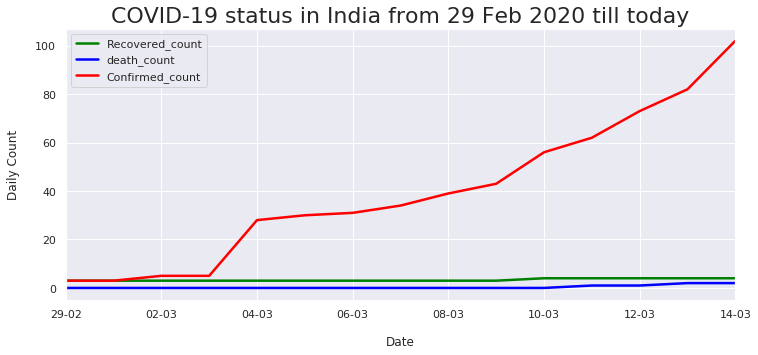

In [375]:
import seaborn as sns; 
import matplotlib.pyplot as plt

sns.set(font_scale=1.0)
count_in_India.iloc[-15:,:].set_index('Date')['Recovered_count'].plot(figsize=(12, 5), linewidth=2.5, color='green')
count_in_India.iloc[-15:,:].set_index('Date')['death_count'].plot(figsize=(12, 5), linewidth=2.5, color='blue')
count_in_India.iloc[-15:,:].set_index('Date')['Confirmed_count'].plot(figsize=(12, 5), linewidth=2.5, color='red')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Count", labelpad=15)
plt.legend()
plt.title("COVID-19 status in India from 29 Feb 2020 till today", y=1.0, fontsize=22);

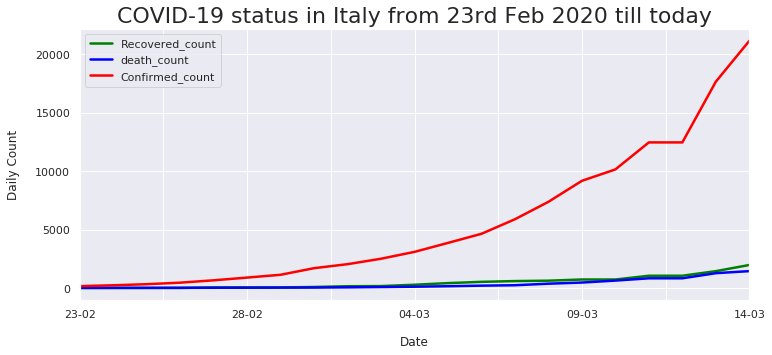

In [401]:
count_in_Italy = result[result['country']=='Italy']

sns.set(font_scale=1.0)
count_in_Italy.iloc[-21:,:].set_index('Date')['Recovered_count'].plot(figsize=(12, 5), linewidth=2.5, color='green')
count_in_Italy.iloc[-21:,:].set_index('Date')['death_count'].plot(figsize=(12, 5), linewidth=2.5, color='blue')
count_in_Italy.iloc[-21:,:].set_index('Date')['Confirmed_count'].plot(figsize=(12, 5), linewidth=2.5, color='red')
plt.xlabel("Date", labelpad=15)
plt.ylabel("Daily Count", labelpad=15)
plt.legend()
plt.title("COVID-19 status in Italy from 23rd Feb 2020 till today", y=1.0, fontsize=22);

In [0]:
rate=result.groupby(['country']).tail(1)

In [0]:
Recovery_rate = (rate["Recovered_count"] / Rates["Confirmed_count"])*100
rate["Recovery_rate"] = Recovery_rate

Death_rate= (rate["death_count"] / result["Confirmed_count"])*100
rate["Death_rate"] = Death_rate

In [0]:
rate=rate.fillna(0)

In [418]:
rate.sort_values('country')

,country,R_Date,Recovered_count,death_count,Confirmed_count,Date,Recovery_rate,Death_rate
1422,Afghanistan,3/14/20,0,0,11,14-03,0.000000,0.000000
5185,Albania,3/14/20,0,1,38,14-03,0.000000,2.631579
1581,Algeria,3/14/20,12,3,37,14-03,32.432432,8.108108
3277,Andorra,3/14/20,1,0,1,14-03,100.000000,0.000000
22251,Antigua and Barbuda,3/14/20,0,0,1,14-03,0.000000,0.000000
...,...,...,...,...,...,...,...,...
10750,United Kingdom,3/14/20,0,0,2,14-03,0.000000,0.000000
22410,Uruguay,3/14/20,0,0,4,14-03,0.000000,0.000000
22781,Venezuela,3/14/20,0,0,2,14-03,0.000000,0.000000
10273,Vietnam,3/14/20,16,0,53,14-03,30.188679,0.000000


In [0]:
rate=rate[(rate['Recovery_rate']!=0.000000) & (rate['Death_rate']!=0.000000)]

Text(0, 0.5, 'Percentage')

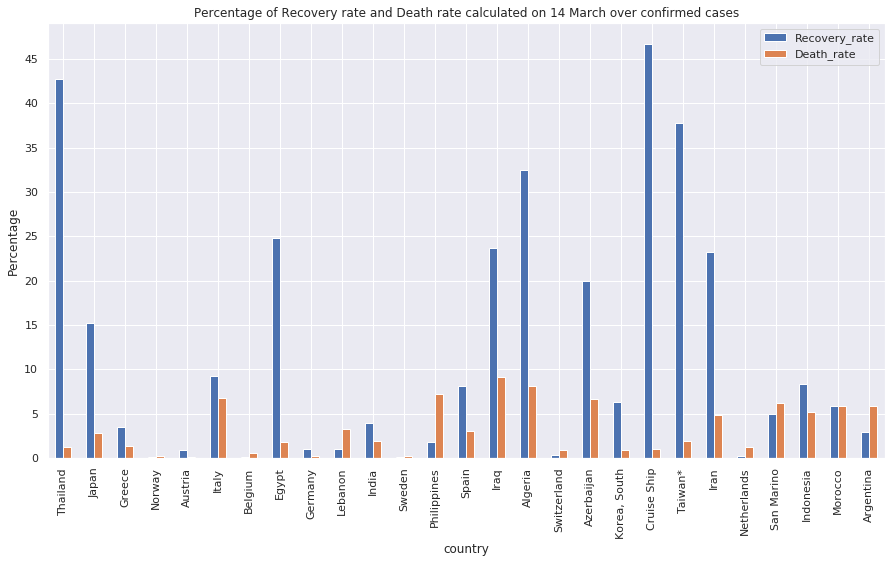

In [444]:
ax=rate.plot(x="country", y=['Recovery_rate',	'Death_rate'], kind="bar",figsize=(15,8),yticks=np.arange(0,50,5),grid=True,title='Percentage of Recovery rate and Death rate calculated on 14 March over confirmed cases')
ax.set_ylabel("Percentage")

In [440]:
import numpy as np
np.arange(0,50,5)

array([ 0,  5, 10, 15, 20, 25, 30, 35, 40, 45])